# Import libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis

## Dataframe

In [3]:
df = pd.read_csv('cardio_train.csv')

print(df.shape)
df.head()

(70000, 1)


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [4]:
# ==================================================================================================== #
# ============================= Creates a new dataframe with same values ============================= #
# ==================================================================================================== #

features = [x for x in df.columns.values]
features = features[0].split(';')

print(f'Features:', len(features))
print('-' * 15)

for c in range(len(features)):
    print(f'{c+1}. {features[c]}')
print('-' * 15)

data = []
for idx in range(df.shape[0]):

    # values = returns the features of a patient
    values = df.iloc[idx].values
    values = values[0].split(';')

    data.append(values)

df = pd.DataFrame(data, columns=[*features])
df.head()

Features: 13
---------------
1. id
2. age
3. gender
4. height
5. weight
6. ap_hi
7. ap_lo
8. cholesterol
9. gluc
10. smoke
11. alco
12. active
13. cardio
---------------


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Is there any null value?
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df['weight'] = df['weight'].astype('float')
df['weight'] = df['weight'].astype('int')

In [8]:
# convert all columns to int, except 'weight'
df.iloc[:,:4] = df.iloc[:,:4].astype('int')
df.iloc[:,5:] = df.iloc[:,5:].astype('int')

In [9]:
df['age'] = np.floor(df['age'] / 365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,51,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,47,1,156,56,100,60,1,1,0,0,0,0


In [10]:
# correlation between the values
df_corr = df.corr()
df_corr.style.background_gradient(cmap='coolwarm')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001834,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053567,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155416,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.291001,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001834,0.053567,0.155416,0.291001,1.000000,0.030702,0.043703,0.141755,0.106864,0.067752,0.067077,-0.016864,0.181657
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043703,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141755,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106864,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067752,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [13]:
corr_aphi_cardio = df.filter(['ap_hi','cardio']).corr()
corr_aphi_cardio

,ap_hi,cardio
ap_hi,1.000000,0.054475
cardio,0.054475,1.000000


In [14]:
corr_aplo_cardio = df.filter(['ap_lo','cardio'])
corr_aplo_cardio.corr()

,ap_lo,cardio
ap_lo,1.000000,0.065719
cardio,0.065719,1.000000


## Graph Visualization

### Group by Gender
1 - women, 2 - men

#### Women who smoke Vs. cardic disease

In [55]:
women_df = df[df['gender'] == 1]
men_df = df[df['gender'] == 2]

In [144]:
def barplot(df1, df2, column_name = '', title='', labels=[0,1] , group='cardio'):
    
    if column_name == 'smoke':
        group1 = df1.groupby(group).smoke.mean()
        group2 = df2.groupby(group).smoke.mean()
        
    elif column_name == 'ap_lo':
        group1 = df1.groupby(group).ap_lo.mean()
        group2 = df2.groupby(group).ap_lo.mean()
        
    elif column_name == 'ap_hi':
        group1 = df1.groupby(group).ap_hi.mean()
        group2 = df2.groupby(group).ap_hi.mean()
        
    elif column_name == 'cholesterol':
        group1 = df1.groupby(group).cholesterol.mean()
        group2 = df2.groupby(group).cholesterol.mean()
        
    elif column_name == 'age':
        group1 = df1.groupby(group).age.mean()
        group2 = df2.groupby(group).age.mean()
    
    elif column_name == 'alco':
        group1 = df1.groupby(group).alco.mean()
        group2 = df2.groupby(group).alco.mean()


    women_means = [group1[0], group1[1]]
    men_means = [group2[0], group2[1]]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, men_means, width, label='men')
    rects2 = ax.bar(x + width/2, women_means, width, label='Women')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

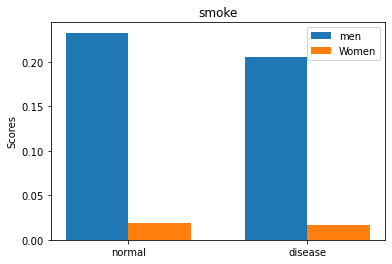

In [145]:
barplot(women_df, men_df, column_name = 'smoke',title='smoke',labels=['normal','disease'], group='cardio')

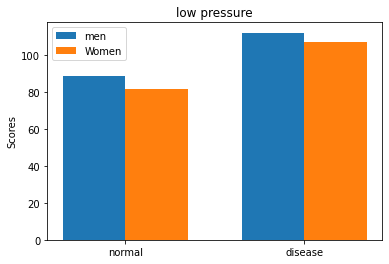

In [146]:
barplot(women_df, men_df, column_name = 'ap_lo',title='low pressure', labels=['normal','disease'], group='cardio')

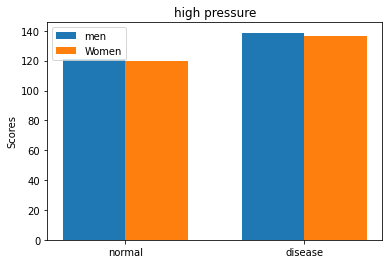

In [147]:
barplot(women_df, men_df, column_name = 'ap_hi',title='high pressure', labels=['normal','disease'], group='cardio')

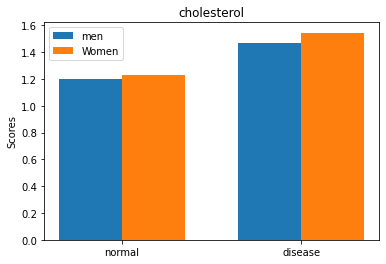

In [148]:
barplot(women_df, men_df, column_name = 'cholesterol',title='cholesterol', labels=['normal','disease'], group='cardio')

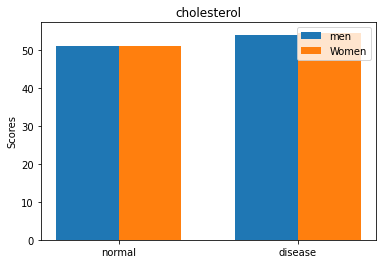

In [149]:
barplot(women_df, men_df, column_name = 'age',title='cholesterol', labels=['normal','disease'], group='cardio')